In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("dataset/велосипеды/50945786_3.csv")
data.head(5)

,Дата,Группа,№ Группы,№ Объявления,Тип площадки,Формат,Размер изображения,Тип устройства,Пол,Категория таргетинга,...,Клики,CTR (%),wCTR (%),Расход (руб.),Конверсия (%)/Товар добавлен в корзину,Конверсия (%)/Заказ оформлен,Конверсия (%)/Лид с Centra Market//Динамика,Конверсии/Товар добавлен в корзину,Конверсии/Заказ оформлен,Конверсии/Лид с Centra Market//Динамика
0,15.06.2023,Велосипед Stinger,4296804875,M-9591380676,поиск,текстовый,без изображения,мобильные,не определен,Целевые запросы,...,0,0.0,0.0,0.0,-,-,-,-,-,-
1,15.06.2023,Велосипед Stinger,4296804875,M-9591380678,поиск,графический,с изображением,десктоп,мужской,Запросы с упоминанием конкурентов,...,0,0.0,0.0,0.0,-,-,-,-,-,-
2,15.06.2023,Велосипед Женский,4296804877,M-9591380694,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,0,0.0,0.0,0.0,-,-,-,-,-,-
3,15.06.2023,Велосипед Женский,4296804877,M-9591380696,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,0,0.0,0.0,0.0,-,-,-,-,-,-
4,15.06.2023,Велосипед Складной,4296804880,M-9591380710,поиск,текстовый,без изображения,мобильные,мужской,Целевые запросы,...,0,0.0,0.0,0.0,-,-,-,-,-,-


In [3]:
X = ['Группа', 'Формат','Тип площадки', 'Формат', 'Тип устройства', 'Пол', 'Категория таргетинга',
       'Упоминание брендов', 'Уровень платежеспособности', 'Возраст']

y = ['wCTR (%)']


X_data = data[X]
y_data = data[y]

y_classification = (data[y]>0).astype(int)

mask = np.where(y_data >= 0)


X_data_f = X_data.iloc[mask[0]] 
y_data_f = y_data.iloc[mask[0]]

columns_to_encode = [col for col in X_data_f.columns]
df_encoded = pd.get_dummies(X_data_f, columns=columns_to_encode).astype(int)



In [4]:
import random

df_reduced = df_encoded

# Получаем индексы каждого класса
class_0_indices = y_classification[y_classification == 0].dropna().index
class_1_indices = y_classification[y_classification == 1].dropna().index

# Преобразуем индексы в списки и перемешиваем их
indices_0 = list(class_0_indices)
random.shuffle(indices_0)

indices_1 = list(class_1_indices)
random.shuffle(indices_1)

min_class = min(len(indices_0), len(indices_1))

# Определяем размеры выборок
test_size = min_class * 0.2 // 2  # Размер тестовой выборки для каждого класса
train_size = len(y_classification) - int(test_size * 2)  # Остальные данные пойдут в тренировочную выборку

# Формируем сбалансированную тестовую выборку (половина из класса 0, половина из класса 1)
X_test = pd.concat([df_reduced.iloc[indices_0[:int(test_size)]], df_reduced.iloc[indices_1[:int(test_size)]]])
y_test = pd.concat([y_classification.iloc[indices_0[:int(test_size)]], y_classification.iloc[indices_1[:int(test_size)]]])

# Формируем несбалансированную тренировочную выборку из оставшихся данных
X_train = pd.concat([df_reduced.iloc[indices_0[int(test_size):]], df_reduced.iloc[indices_1[int(test_size):]]])
y_train = pd.concat([y_classification.iloc[indices_0[int(test_size):]], y_classification.iloc[indices_1[int(test_size):]]])

# Проверим размеры выборок
print(f"Размер тренировочной выборки: {X_train.shape}, Размер тестовой выборки: {X_test.shape}")

Размер тренировочной выборки: (9661, 62), Размер тестовой выборки: (262, 62)


In [5]:
X_train

,Группа_Велик ГЕО,Группа_Велик Купить / Цена,Группа_Веломагазин,Группа_Велосипед +для лет/года,Группа_Велосипед Favorit,Группа_Велосипед Novatrack,Группа_Велосипед Stels,Группа_Велосипед Stinger,Группа_Велосипед Ангарск,Группа_Велосипед Большой,...,Уровень платежеспособности_2-5%,Уровень платежеспособности_6-10%,Уровень платежеспособности_Остальные,Возраст_18-24,Возраст_25-34,Возраст_35-44,Возраст_45-54,Возраст_младше 18,Возраст_не определен,Возраст_старше 55
4754,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3204,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3301,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2155,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3412,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9886,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5413,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


## Деревья решений

#### 1. Random baseline

In [6]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_random = np.random.choice([0, 1], size=len(y_test))
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Точность рандомного классификатора: {accuracy_random * 100:.2f}%')

print(classification_report(y_test, y_pred_random))



Точность рандомного классификатора: 41.22%
              precision    recall  f1-score   support

           0       0.41      0.40      0.40       131
           1       0.41      0.43      0.42       131

    accuracy                           0.41       262
   macro avg       0.41      0.41      0.41       262
weighted avg       0.41      0.41      0.41       262



#### 2. Просто дерево

In [7]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.99      0.67       131
           1       0.83      0.04      0.07       131

    accuracy                           0.52       262
   macro avg       0.67      0.52      0.37       262
weighted avg       0.67      0.52      0.37       262



#### 3. Анализ важности признаков для получившейся модели



##### Что такое Permutation Importance?
**Permutation Importance** — это метод оценки важности признаков, основанный на перетасовке значений признаков в тестовом наборе. Если перетасовка признака сильно снижает точность модели, этот признак важен.

##### Как работает:
1. Перетасовываем значения одного признака.
2. Сравниваем точность модели до и после перетасовки.
3. Если точность сильно падает — признак важен.

##### Пример:
```python
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
print(result.importances_mean)
```

##### Интерпретация:
- **Положительные значения**: признак важен.
- **Отрицательные значения**: признак ухудшает модель.

##### Отличие от ADD-DEL
- **`Permutation Importance`** оценивает признаки по одному, перетасовывая их значения.
- **ADD-DEL** последовательно добавляет или удаляет признаки, чтобы найти лучший набор.
- **Цель**: Permutation Importance — оценка важности признаков, ADD-DEL — поиск оптимального набора признаков.
``` 


In [8]:
from sklearn.inspection import permutation_importance
import numpy as np


clf.fit(X_train, y_train)


result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)


perm_sorted_idx = result.importances_mean.argsort()
for i in perm_sorted_idx[::-1]:
    print(f"Признак {i}, важность: {result.importances_mean[i]:.4f}")


Признак 38, важность: 0.0118
Признак 32, важность: 0.0103
Признак 27, важность: 0.0103
Признак 25, важность: 0.0103
Признак 30, важность: 0.0103
Признак 44, важность: 0.0088
Признак 43, важность: 0.0076
Признак 35, важность: 0.0073
Признак 41, важность: 0.0042
Признак 56, важность: 0.0042
Признак 1, важность: 0.0038
Признак 8, важность: 0.0038
Признак 58, важность: 0.0038
Признак 16, важность: 0.0027
Признак 48, важность: 0.0011
Признак 17, важность: 0.0011
Признак 37, важность: 0.0011
Признак 55, важность: 0.0008
Признак 61, важность: 0.0004
Признак 23, важность: 0.0004
Признак 59, важность: 0.0004
Признак 39, важность: 0.0000
Признак 46, важность: 0.0000
Признак 42, важность: 0.0000
Признак 45, важность: 0.0000
Признак 49, важность: 0.0000
Признак 52, важность: 0.0000
Признак 51, важность: 0.0000
Признак 22, важность: 0.0000
Признак 20, важность: 0.0000
Признак 0, важность: 0.0000
Признак 14, важность: 0.0000
Признак 7, важность: 0.0000
Признак 4, важность: 0.0000
Признак 15, важност

In [9]:
mean_importance = 0.0008 #np.mean(result.importances_mean)
best_features_idx = np.where(result.importances_mean > mean_importance)[0]


X_train_best = X_train.values[:, best_features_idx]
X_test_best = X_test.values[:, best_features_idx]

clf_best = DecisionTreeClassifier(random_state=42)
clf_best.fit(X_train_best, y_train)

y_pred_best = clf_best.predict(X_test_best)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       131
           1       1.00      0.01      0.02       131

    accuracy                           0.50       262
   macro avg       0.75      0.50      0.34       262
weighted avg       0.75      0.50      0.34       262



#### 4. Балансировка

In [10]:

clf_weighted = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf_weighted.fit(X_train, y_train)

# Оценка на тестовых данных
y_pred = clf_weighted.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       131
           1       0.58      0.54      0.56       131

    accuracy                           0.58       262
   macro avg       0.58      0.58      0.58       262
weighted avg       0.58      0.58      0.58       262



#### 5. Балансировка + важность признаков

In [11]:
result = permutation_importance(clf_weighted, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()
for i in perm_sorted_idx[::-1]:
    print(f"Признак {i}, важность: {result.importances_mean[i]:.4f}")


Признак 44, важность: 0.0385
Признак 38, важность: 0.0210
Признак 35, важность: 0.0160
Признак 37, важность: 0.0137
Признак 48, важность: 0.0137
Признак 50, важность: 0.0126
Признак 59, важность: 0.0115
Признак 34, важность: 0.0107
Признак 61, важность: 0.0095
Признак 3, важность: 0.0088
Признак 41, важность: 0.0073
Признак 57, важность: 0.0073
Признак 18, важность: 0.0046
Признак 15, важность: 0.0046
Признак 30, важность: 0.0046
Признак 32, важность: 0.0046
Признак 27, важность: 0.0046
Признак 25, важность: 0.0046
Признак 52, важность: 0.0038
Признак 54, важность: 0.0034
Признак 7, важность: 0.0031
Признак 8, важность: 0.0031
Признак 0, важность: 0.0019
Признак 13, важность: 0.0011
Признак 12, важность: 0.0008
Признак 20, важность: 0.0008
Признак 24, важность: 0.0004
Признак 4, важность: 0.0004
Признак 36, важность: 0.0000
Признак 23, важность: 0.0000
Признак 14, важность: 0.0000
Признак 22, важность: 0.0000
Признак 45, важность: 0.0000
Признак 49, важность: 0.0000
Признак 42, важност

In [12]:
mean_importance = 0 #np.mean(result.importances_mean)
best_features_idx = np.where(result.importances_mean > mean_importance)[0]


X_train_best = X_train.values[:, best_features_idx]
X_test_best = X_test.values[:, best_features_idx]

clf_weighted = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf_weighted.fit(X_train_best, y_train)

# Оценка на тестовых данных
y_pred = clf_weighted.predict(X_test_best)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.58      0.61       131
           1       0.62      0.68      0.65       131

    accuracy                           0.63       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.63      0.63      0.63       262



#### 6. Подбор гиперпараметров с optuna

Как правильно подбирать гиперпараметры? 

In [13]:
!pip install optuna

In [14]:
import optuna
from sklearn.model_selection import cross_val_score


def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Обучение дерева решений с заданными параметрами
    clf = DecisionTreeClassifier(
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        class_weight='balanced',
        random_state=42
    )
    
    score = cross_val_score(clf, X_train_best, y_train, cv=5)
    return np.mean(score)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Результаты
print(f"Лучшие параметры: {study.best_params}")
print(f"Лучшая средняя точность: {study.best_value:.2f}")


[I 2024-10-07 11:06:15,832] A new study created in memory with name: no-name-c5266e9d-f38c-4c37-961b-833a6fb1d0f2
[I 2024-10-07 11:06:15,956] Trial 0 finished with value: 0.4605133782971791 and parameters: {'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.4605133782971791.
[I 2024-10-07 11:06:16,083] Trial 1 finished with value: 0.48794362703357513 and parameters: {'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.48794362703357513.
[I 2024-10-07 11:06:16,256] Trial 2 finished with value: 0.450884014056825 and parameters: {'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.48794362703357513.
[I 2024-10-07 11:06:16,411] Trial 3 finished with value: 0.4873227232367114 and parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.48794362703357513.
[I 2024-10-07 11:06:16,538] Trial 4 finished with value: 0.5

Лучшие параметры: {'max_depth': 31, 'min_samples_split': 5, 'min_samples_leaf': 2}
Лучшая средняя точность: 0.54


In [15]:

clf_weighted = DecisionTreeClassifier(random_state=42, max_depth = 31, min_samples_split=6, min_samples_leaf=9, class_weight='balanced')
clf_weighted.fit(X_train_best, y_train)

# Оценка на тестовых данных
y_pred = clf_weighted.predict(X_test_best)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.48      0.54       131
           1       0.57      0.69      0.63       131

    accuracy                           0.59       262
   macro avg       0.59      0.59      0.58       262
weighted avg       0.59      0.59      0.58       262



#### 7. Ваши предложения? 

Варианты:
* Попробовать сжать размерность;
* Поиграться с балансировкой классов;
* Попробовать алгоритм ADD-DEL;
* еще варианты? 

### Bonus: SHAP-value

In [27]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.1/453.1 kB 482.3 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


In [13]:
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [14]:
mean_importance = 0 #np.mean(result.importances_mean)
best_features_idx = np.where(result.importances_mean > mean_importance)[0]


X_train_best = X_train.iloc[:, best_features_idx]
X_test_best = X_test.iloc[:, best_features_idx]

clf_weighted = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf_weighted.fit(X_train_best, y_train)

# Оценка на тестовых данных
y_pred = clf_weighted.predict(X_test_best)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       131
           1       0.62      0.68      0.65       131

    accuracy                           0.63       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.63      0.63      0.63       262



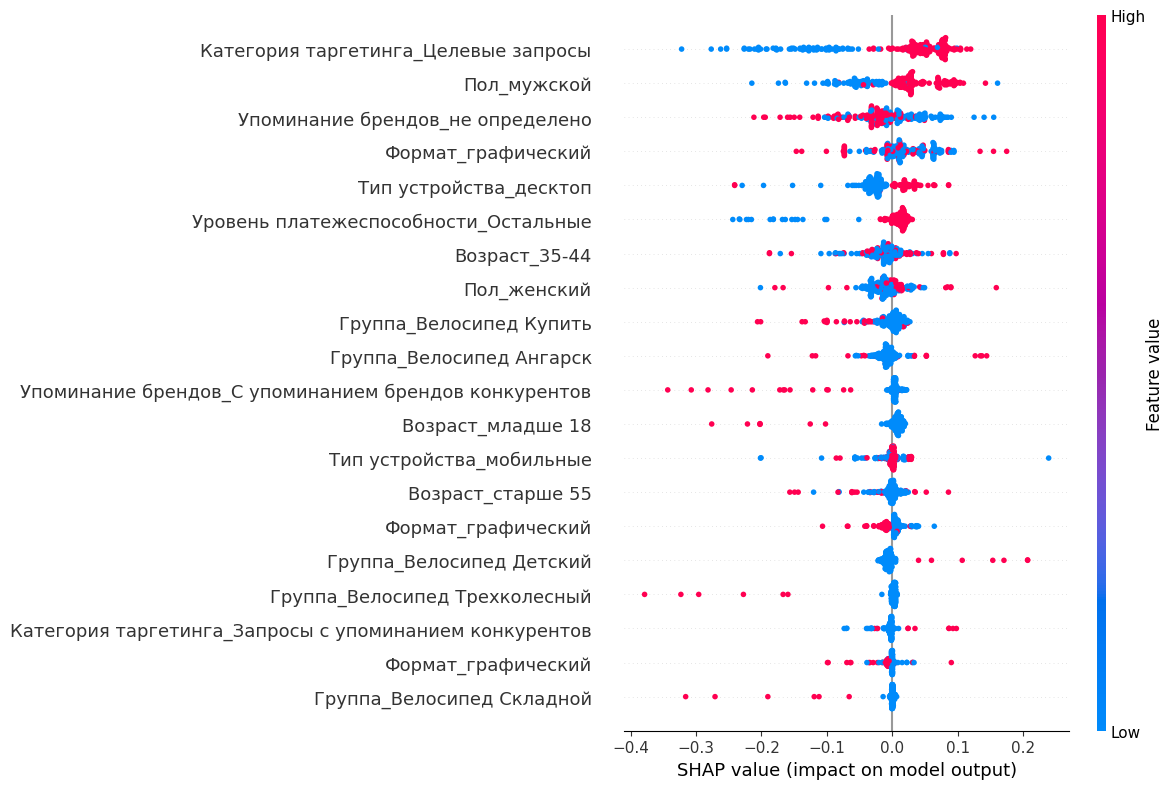

In [35]:
import shap


explainer = shap.Explainer(clf_weighted)
shap_values = explainer(X_test_best.values)
shap.summary_plot(shap_values.values[:,:,1], X_test_best.values,  feature_names=X_test_best.columns, plot_size=(12, 8))


#### Интерпретация графика

Признаки, расположенные выше на графике, имеют большее влияние на модель.

Цвет точек указывает на значение признака для данного наблюдения: высокие значения признака обозначены красным цветом, низкие значения — синим.

Положение точек по горизонтали показывает влияние признака на прогнозную вероятность. Признаки, для которых точки смещены вправо (положительные значения SHAP), увеличивают вероятность исхода модели, в то время как признаки с точками, смещенными влево (отрицательные значения SHAP), уменьшают её.

Горизонтальное распределение точек для каждого признака показывает степень его влияния на различные наблюдения. Широкое распределение означает, что признак оказывает различное влияние на разные наблюдения.

#### Какие выводы можно сделать?